# Proyecto #1

## Course: Data science in Python
## Name: Otto Chamo
## Carnet: 19001395
## Sección: V


# Importing libraries

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import utility_functions as ufs
from correlation_plot_args import CorrelationPlotArgs
from linear_regression_model import LinearRegresionModel
from linear_regression import LinearRegressionScratch
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model



# Loading dataset

In [3]:
dataset = pd.DataFrame(np.load('./data/proyecto_training_data.npy'))

dataset.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5    259
dtype: int64

# The project

### Renaming columns to their descriptive names provided in <code>data/Data fields.txt</code>

In [5]:
SALE_PRICE_COL = "SalePrice"
OVERALL_QUAL_COL = "OverallQual"
FIRST_FLOOR_SF_COL = "1stFlrSF"
TOTAL_ROOMS_ABOVE_GRADE_COL = "TotRmsAbvGrd"
YEAR_BUILT_COL = "YearBuilt"
LOT_FRONTAGE_COL = "LotFrontage"


In [6]:
dataset = dataset.rename(columns={
    0: SALE_PRICE_COL,
    1: OVERALL_QUAL_COL,
    2: FIRST_FLOOR_SF_COL,
    3: TOTAL_ROOMS_ABOVE_GRADE_COL,
    4: YEAR_BUILT_COL,
    5: LOT_FRONTAGE_COL
})

dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Dataset dimension

In [7]:
dataset.shape

(1460, 6)

## Dataset data types

In [8]:
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

## Data preprocessing

### Inspecting dataset

In [9]:
datasetDesc = dataset.describe()

## Inspecting values and getting range

In [10]:
rangeSalePrice = ufs.calculateRangeForColumn(datasetDesc, SALE_PRICE_COL)
rangeOverallQuality = ufs.calculateRangeForColumn(datasetDesc, OVERALL_QUAL_COL)
range1sfFloor = ufs.calculateRangeForColumn(datasetDesc, FIRST_FLOOR_SF_COL)
rangeTotRms = ufs.calculateRangeForColumn(datasetDesc, TOTAL_ROOMS_ABOVE_GRADE_COL)
rangeYearBuilt = ufs.calculateRangeForColumn(datasetDesc, YEAR_BUILT_COL)
rangeLotFrontage = ufs.calculateRangeForColumn(datasetDesc, LOT_FRONTAGE_COL)
print(f"rangeOverallQuality: {rangeOverallQuality}")
print(f"range1sfFloor: {range1sfFloor}")
print(f"rangeTotRms: {rangeTotRms}")
print(f"rangeYearBuilt: {rangeYearBuilt}")
print(f"rangeLotFrontage: {rangeLotFrontage}")
# updating dataset description to include range
newRow = [rangeSalePrice, rangeOverallQuality, range1sfFloor, rangeTotRms, rangeYearBuilt, rangeLotFrontage]
newRowDf = pd.DataFrame([newRow], index=['Range'], columns=datasetDesc.columns)
datasetTrainDescription = pd.concat([datasetDesc, newRowDf])

datasetTrainDescription

rangeOverallQuality: 9.0
range1sfFloor: 4358.0
rangeTotRms: 12.0
rangeYearBuilt: 138.0
rangeLotFrontage: 292.0


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
Range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


### Detecting nulls

In [11]:
dataset.isnull().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64

### Displaying percentage of nulls

In [12]:
dataset.isna().sum() / (dataset.shape[0] / 100)

SalePrice        0.000000
OverallQual      0.000000
1stFlrSF         0.000000
TotRmsAbvGrd     0.000000
YearBuilt        0.000000
LotFrontage     17.739726
dtype: float64

### Applyin mean imputation


In [13]:
dataset = dataset.fillna(dataset.mean())

In [14]:
dataset.isna().sum() / (dataset.shape[0] / 100)

SalePrice       0.0
OverallQual     0.0
1stFlrSF        0.0
TotRmsAbvGrd    0.0
YearBuilt       0.0
LotFrontage     0.0
dtype: float64

### Applying min-max normalization

In [15]:
def normalization_with_min_max(col):
  max_val = np.max(col)
  min_val = np.min(col)

  return (col - min_val) / (max_val - min_val)


In [16]:
normalizedDataset = dataset.copy()

for column in normalizedDataset.columns:
  normalizedDataset[column] = normalization_with_min_max(normalizedDataset[column])

normalizedDataset.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.202779,0.566591,0.190139,0.376484,0.719332,0.167979
std,0.110321,0.153666,0.088708,0.135449,0.218862,0.075425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.132030,0.444444,0.125746,0.250000,0.594203,0.133562
50%,0.177892,0.555556,0.172786,0.333333,0.731884,0.167979
75%,0.248715,0.666667,0.242600,0.416667,0.927536,0.198630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## We want to predict the SalePrice so we take that as our dependent variable $(y) and we remove it from the dataset

In [17]:
salePriceColumn = normalizedDataset.SalePrice

datasetToWork = normalizedDataset.copy().drop(SALE_PRICE_COL, axis=1)

datasetToWork

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,0.666667,0.119780,0.500000,0.949275,0.150685
1,0.555556,0.212942,0.333333,0.753623,0.202055
2,0.666667,0.134465,0.333333,0.934783,0.160959
3,0.666667,0.143873,0.416667,0.311594,0.133562
4,0.777778,0.186095,0.583333,0.927536,0.215753
...,...,...,...,...,...
1455,0.555556,0.142038,0.416667,0.920290,0.140411
1456,0.555556,0.399036,0.416667,0.768116,0.219178
1457,0.666667,0.195961,0.583333,0.500000,0.154110
1458,0.444444,0.170721,0.250000,0.565217,0.160959


## 2. Splitting in 80% and 20% for validation and testing

In [18]:
dataset_train, dataset_test, salesColumn_train, salesColumn_test = train_test_split(datasetToWork, salePriceColumn, test_size=0.2)

## 3. Exploring some values of the dataset and calculating range

In [19]:
datasetTrainDescription: pd.DataFrame = dataset_train.describe()

datasetTrainDescription

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.565925,0.189821,0.377354,0.720810,0.168789
std,0.152586,0.087915,0.135756,0.217217,0.072990
min,0.000000,0.000000,0.000000,0.021739,0.000000
25%,0.444444,0.128040,0.250000,0.594203,0.133562
50%,0.555556,0.173015,0.333333,0.731884,0.167979
75%,0.666667,0.241051,0.416667,0.927536,0.198630
max,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Ploting an histogram for each variable

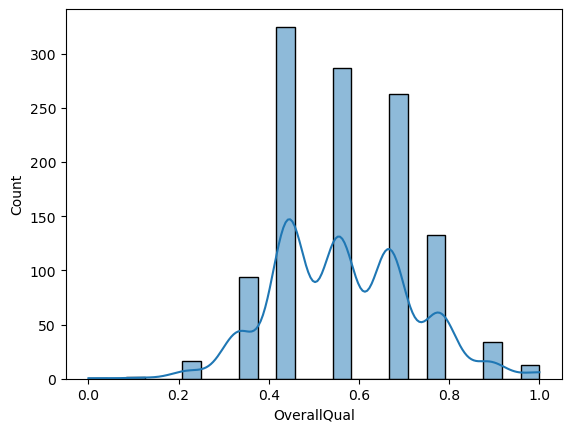

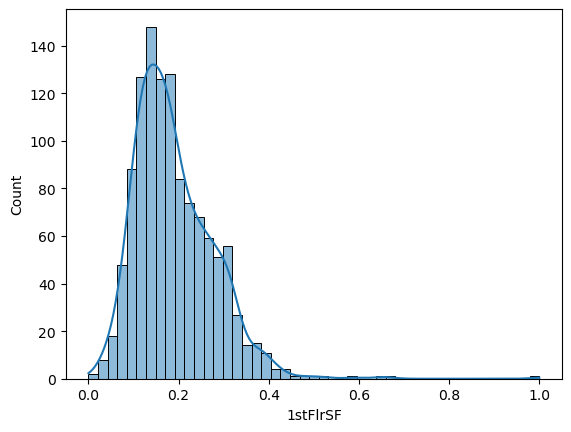

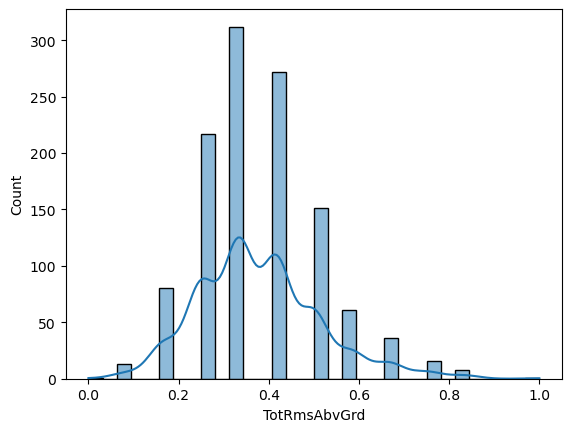

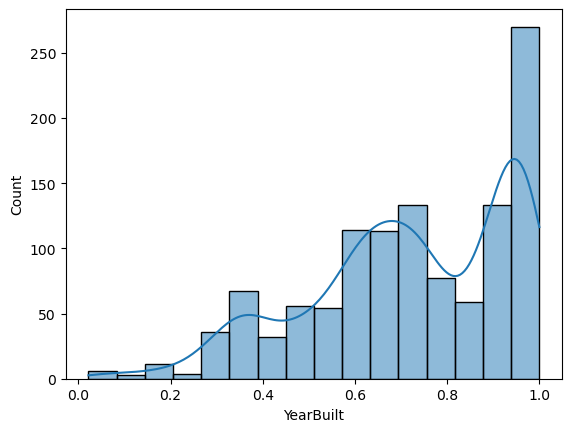

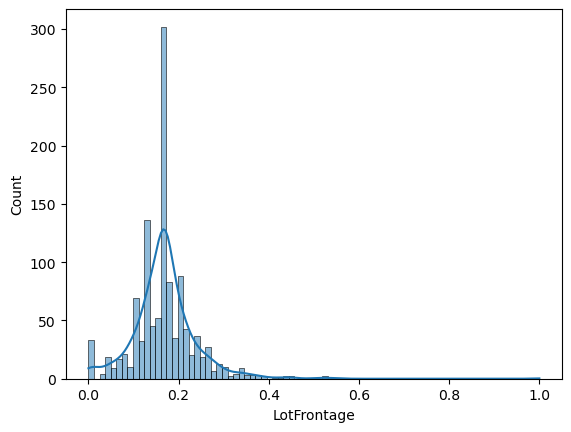

In [20]:
ufs.plot_columns(dataset_train)

## Calculating correlation coefficient of each independent variable.

The Equation for this coefficient is the following

$$
    r = \frac{\sum x_iy_i}{\sqrt{(\sum x_i^2)(\sum y_i^2)}}
$$

Where $x_i = (x_i - \overline{x})$ and $y_i = (y_i - \overline{y})$


### 5.1 Calculating correlation values between variables

In [21]:
corrOverallQual = ufs.calculateCorrelation(dataset_train[OVERALL_QUAL_COL], salesColumn_train)
corrFirstFloor = ufs.calculateCorrelation(dataset_train[FIRST_FLOOR_SF_COL], salesColumn_train)
corrTotalRooms = ufs.calculateCorrelation(dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL], salesColumn_train)
corrYearBuilt = ufs.calculateCorrelation(dataset_train[YEAR_BUILT_COL], salesColumn_train)
corrLotFrontage = ufs.calculateCorrelation(dataset_train[LOT_FRONTAGE_COL], salesColumn_train)

ufs.printCorrelation(OVERALL_QUAL_COL, corrOverallQual[0, 1])
ufs.printCorrelation(FIRST_FLOOR_SF_COL, corrFirstFloor[0, 1])
ufs.printCorrelation(TOTAL_ROOMS_ABOVE_GRADE_COL, corrTotalRooms[0, 1])
ufs.printCorrelation(YEAR_BUILT_COL, corrYearBuilt[0, 1])
ufs.printCorrelation(LOT_FRONTAGE_COL, corrLotFrontage[0, 1])


Correlation for OverallQual = 0.7941
Correlation for 1stFlrSF = 0.5959
Correlation for TotRmsAbvGrd = 0.5316
Correlation for YearBuilt = 0.5180
Correlation for LotFrontage = 0.3209


### 5.2 Plot Scatter plot for each variable using matplotlib.
### Chooose two that have the greater correlation coefficient.

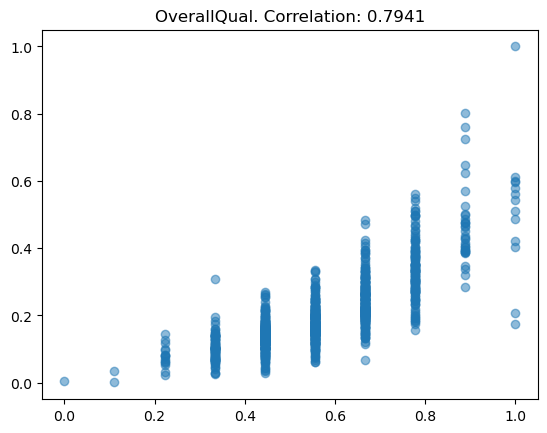

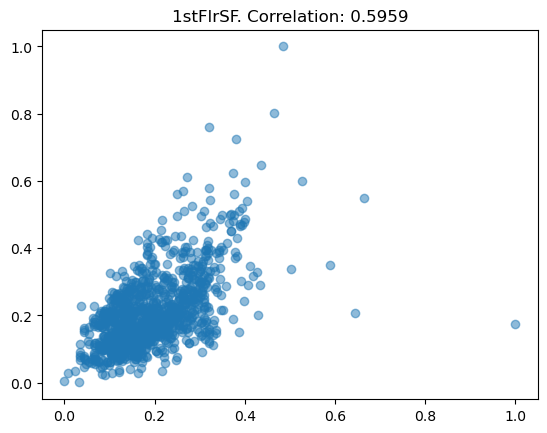

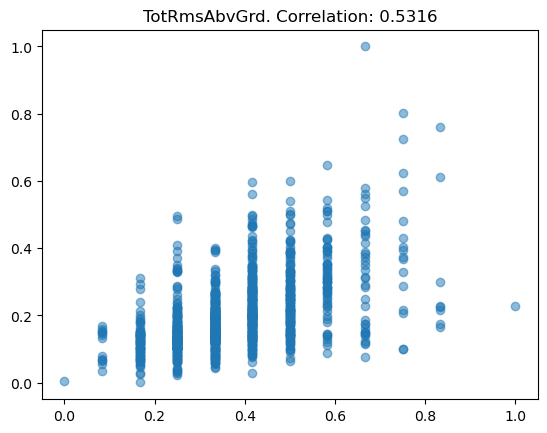

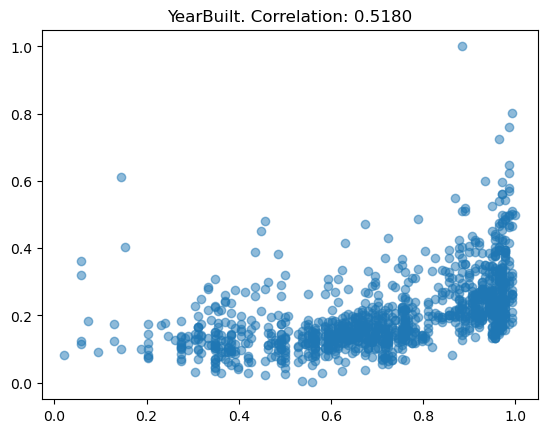

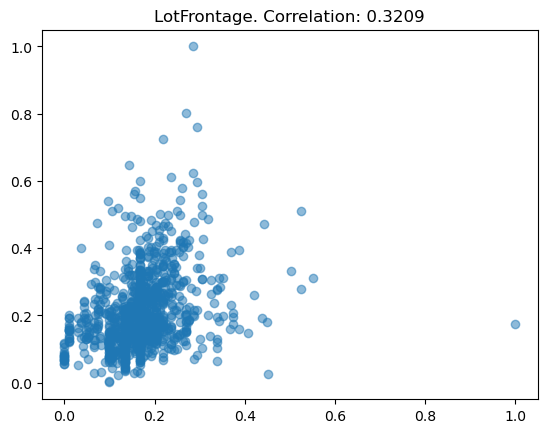

In [22]:
args = CorrelationPlotArgs(
    x = dataset_train[OVERALL_QUAL_COL],
    y = salesColumn_train,
    correlation= corrOverallQual[0, 1],
    title=OVERALL_QUAL_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[FIRST_FLOOR_SF_COL],
    y = salesColumn_train,
    correlation= corrFirstFloor[0, 1],
    title=FIRST_FLOOR_SF_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL],
    y = salesColumn_train,
    correlation=corrTotalRooms[0, 1],
    title=TOTAL_ROOMS_ABOVE_GRADE_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[YEAR_BUILT_COL],
    y = salesColumn_train,
    correlation=corrYearBuilt[0, 1],
    title=YEAR_BUILT_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[LOT_FRONTAGE_COL],
    y = salesColumn_train,
    correlation=corrLotFrontage[0, 1],
    title=LOT_FRONTAGE_COL
)
ufs.plotScatterPlot(args)

The variables we are gonna pick are OverrallQual and 1stFlrSF

## Lineal Regression from scratch (no libraries)
$$y = \beta_0 + \beta_1x $$

## Model with scikit and training of models

In [24]:
sciKitOverallModel = linear_model.LinearRegression()

sciKitOverallModel.fit(dataset_train[OVERALL_QUAL_COL].values.reshape(-1,1), salesColumn_train,)
y_predScikitOverallModel = sciKitOverallModel.predict(dataset_test[OVERALL_QUAL_COL].values.reshape(-1, 1))



mse = mean_squared_error(salesColumn_test, y_predScikitOverallModel)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.005599201421081414


In [25]:
sciKitFirstFloorModel = linear_model.LinearRegression()

sciKitFirstFloorModel.fit(dataset_train[FIRST_FLOOR_SF_COL].values.reshape(-1,1), salesColumn_train,)
y_predSciKitFirstFloorModel = sciKitFirstFloorModel.predict(dataset_test[FIRST_FLOOR_SF_COL].values.reshape(-1, 1))


mse = mean_squared_error(salesColumn_test, y_predSciKitFirstFloorModel)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.008534679085213836


In [26]:
vectorTrainOverallQual = dataset_train[OVERALL_QUAL_COL].to_numpy()
vectorFirstFloor = dataset_train[FIRST_FLOOR_SF_COL].to_numpy()
vectorTrainSalesColumn = salesColumn_train.to_numpy()

regressionFromScratch = LinearRegressionScratch()

modelsOverallQual, errorsOverallQual = regressionFromScratch.fit(x=vectorTrainOverallQual,y=vectorTrainSalesColumn, epochs=40, imprimir_error_cada=50, learning_rate=0.04)
modelsFirstFloor, errorsFirstFloor = regressionFromScratch.fit(x=vectorFirstFloor, y=vectorTrainSalesColumn, epochs=80, imprimir_error_cada=10, learning_rate=0.04)

Error obtained in iteration 10: 0.016088102642581658
Error obtained in iteration 20: 0.01332445775723259
Error obtained in iteration 30: 0.011331044976393718
Error obtained in iteration 40: 0.009896099272760493
Error obtained in iteration 50: 0.00886612223770323
Error obtained in iteration 60: 0.008129850863592145
Error obtained in iteration 70: 0.0076066370947484845
Error obtained in iteration 80: 0.007238024584986056


### 

## Plotting trained models

## Plots for OverallQual column

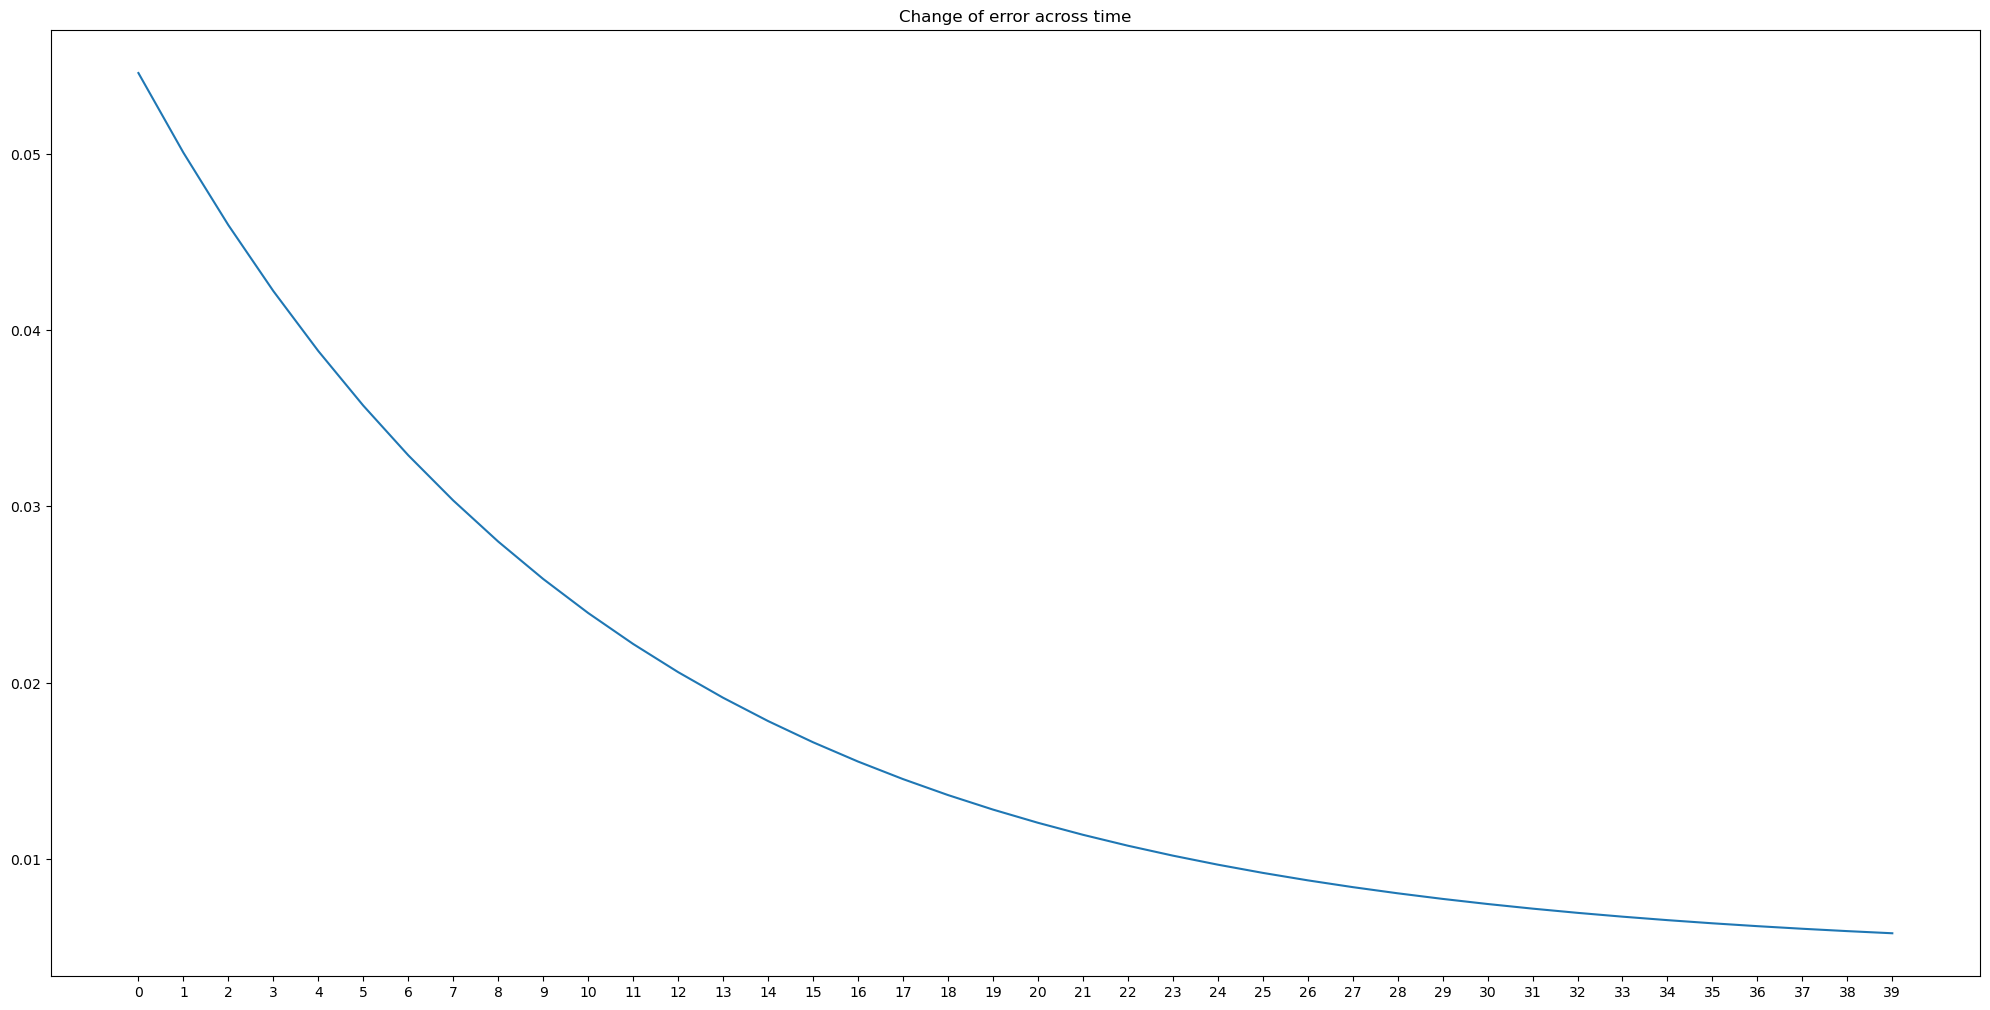

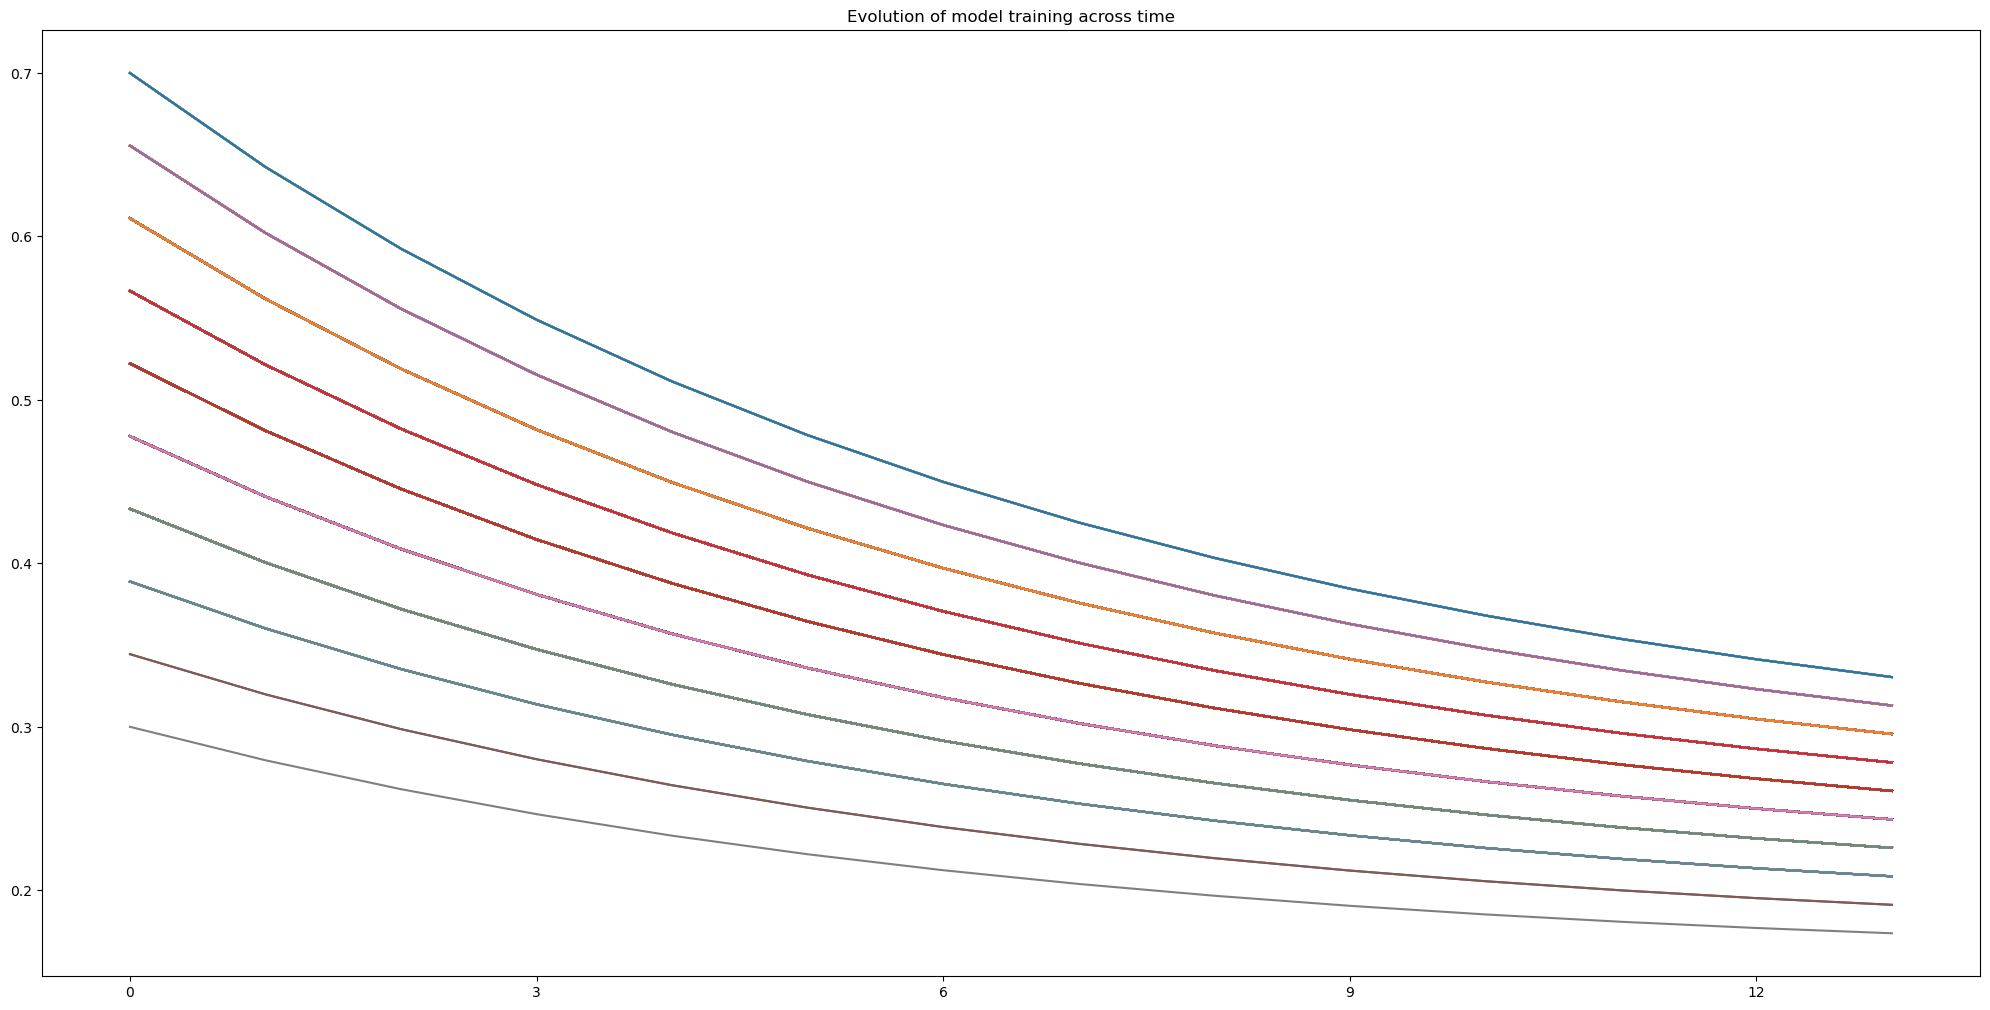

In [27]:
regressionFromScratch.plot_trained_model_errors(errorsOverallQual)
regressionFromScratch.plot_trained_model(modelsOverallQual, 3)

## Plots for FirstFloor column

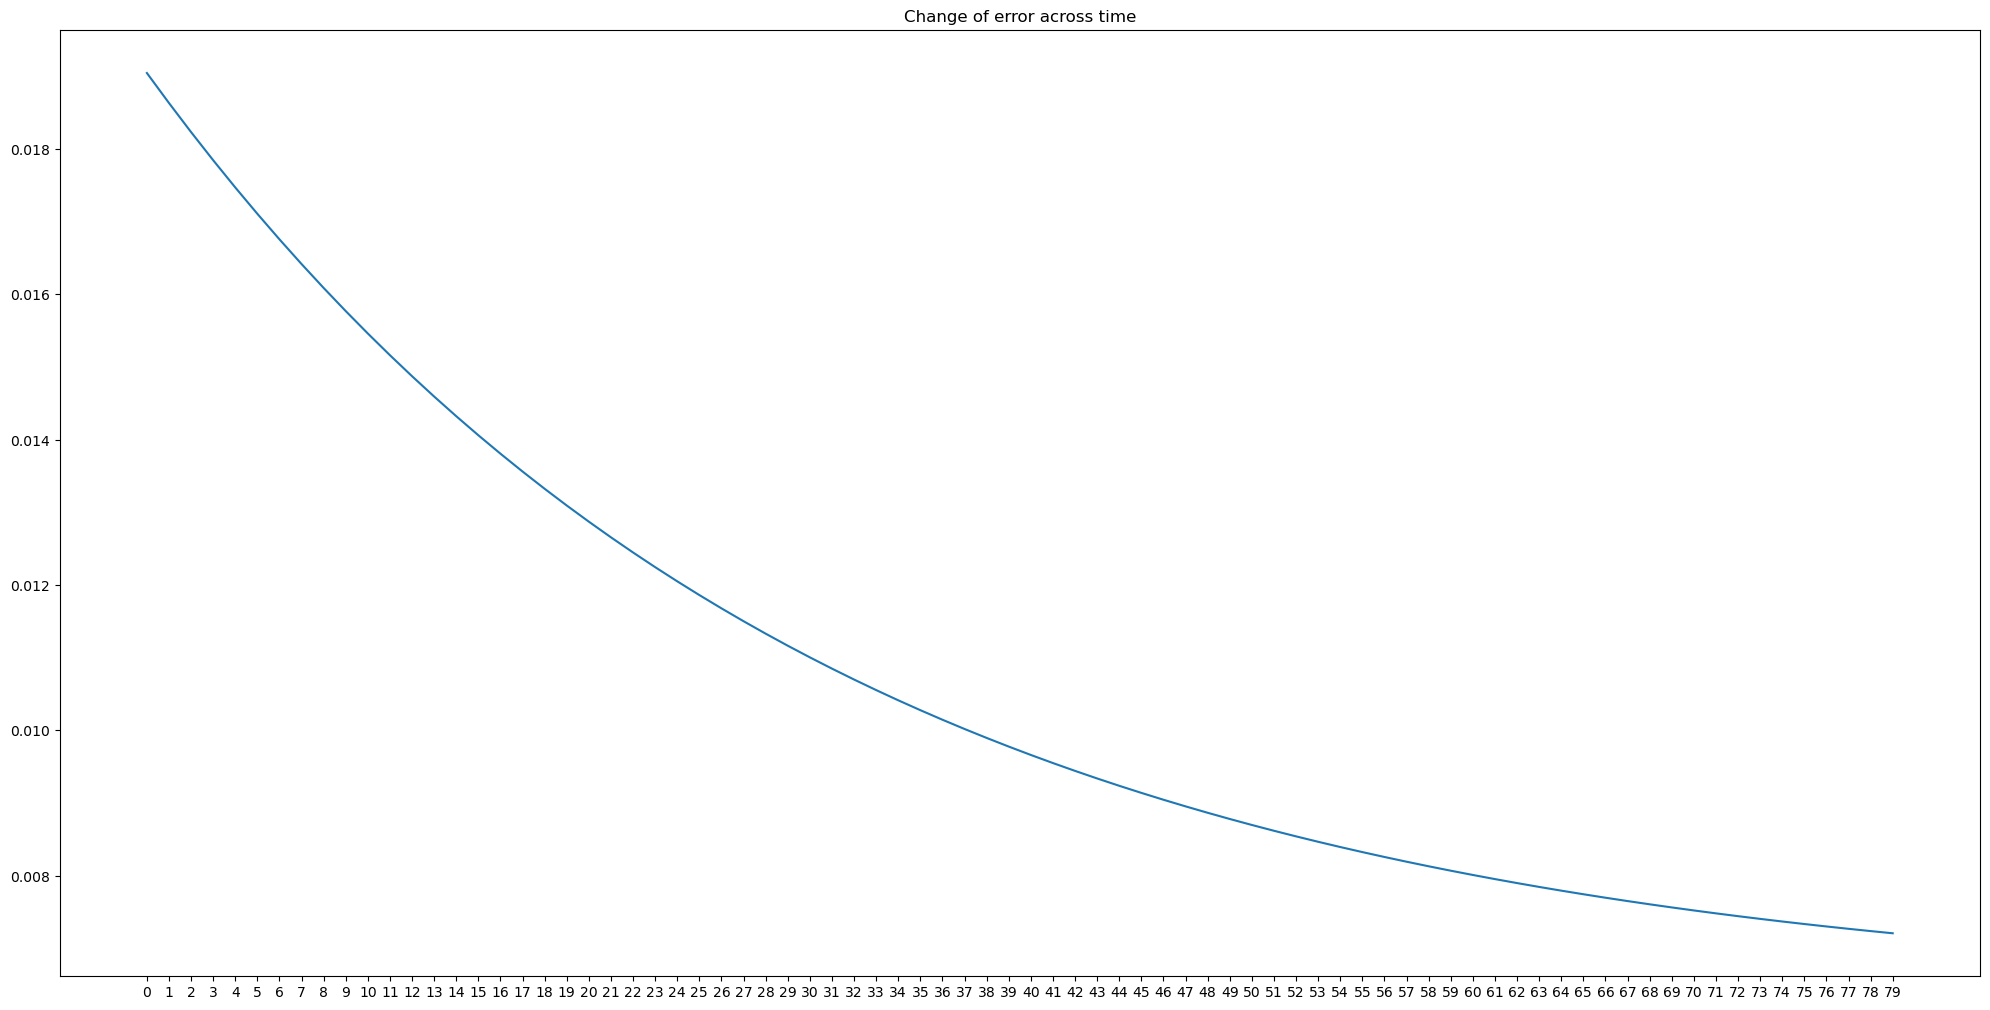

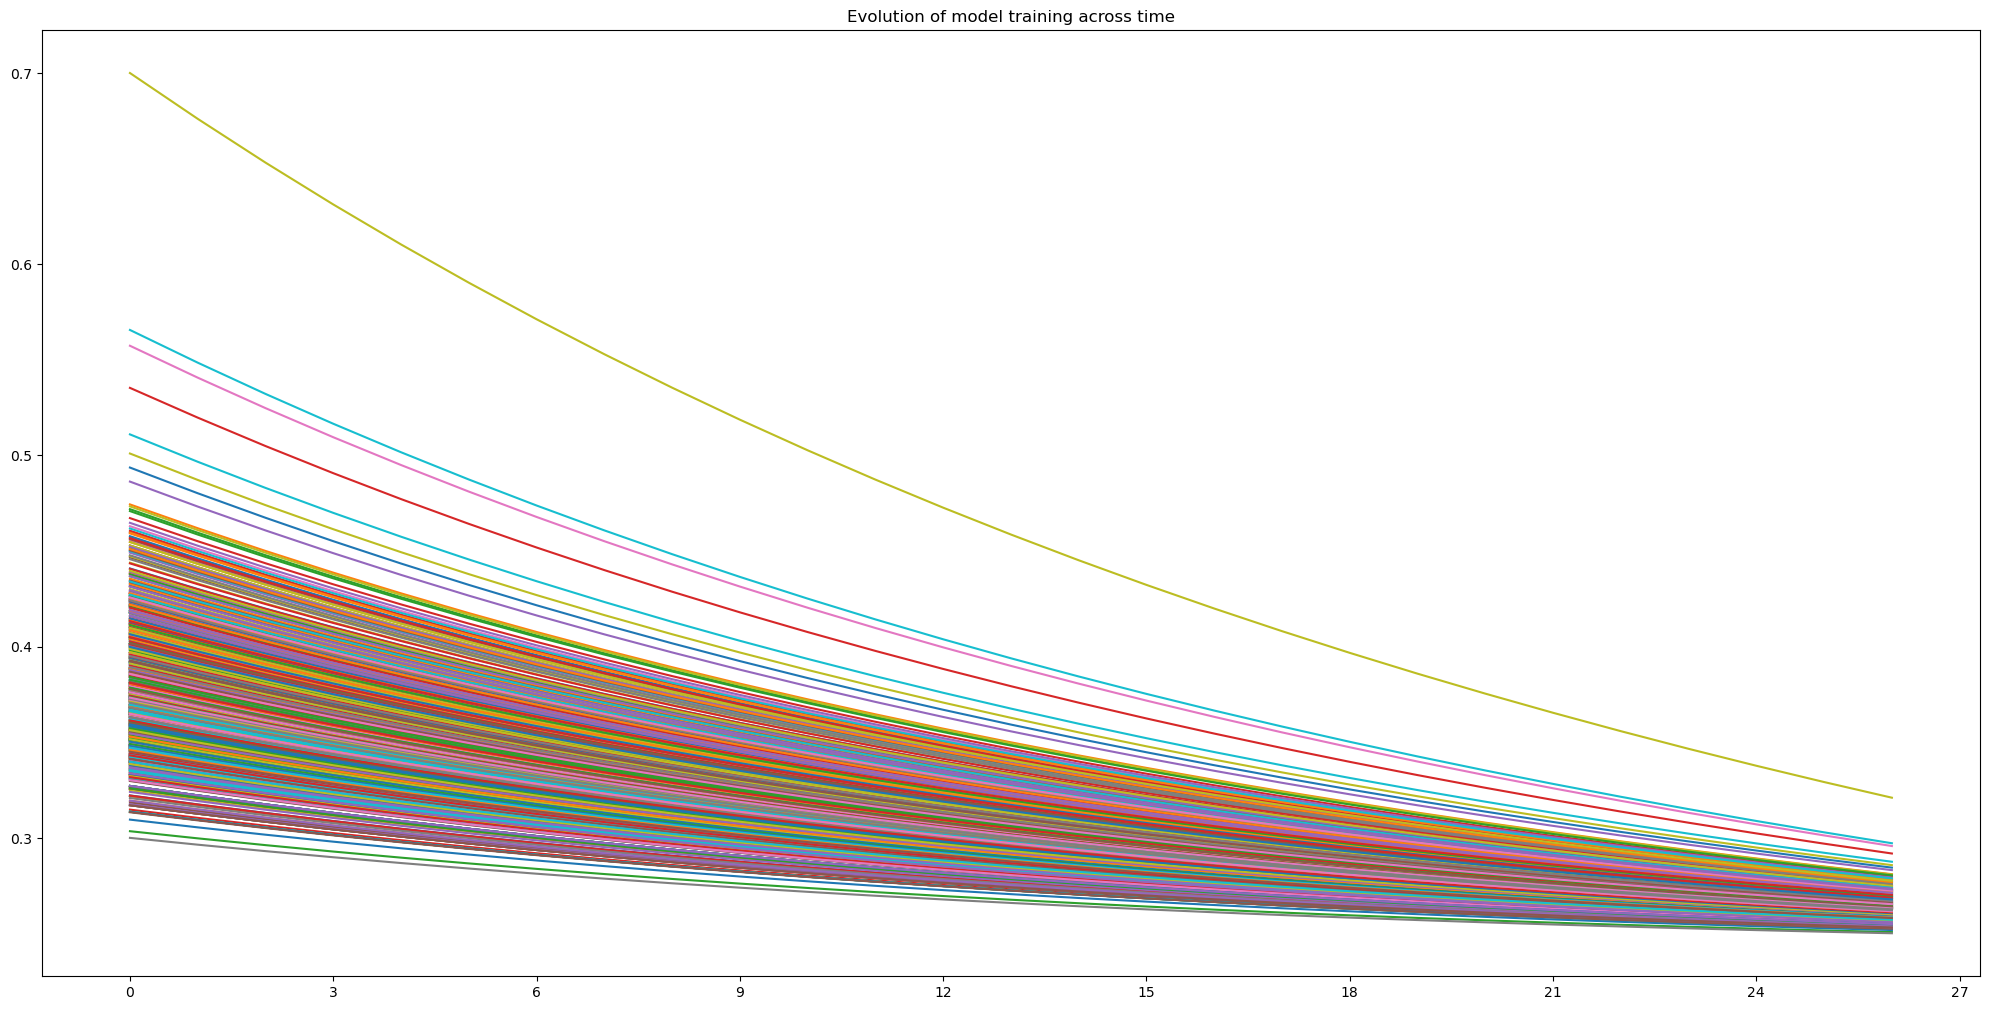

In [36]:
regressionFromScratch.plot_trained_model_errors(errorsFirstFloor)
regressionFromScratch.plot_trained_model(modelsFirstFloor, 3)

## Model comparasion manual vs scikit

In [29]:
testVectorOverallQual = dataset_test[OVERALL_QUAL_COL].to_numpy()
testVectorFirstFloor = dataset_test[FIRST_FLOOR_SF_COL].to_numpy()

manualModelPreds, scikitPreds, avgPreds = regressionFromScratch.predict_comparison(
    testVectorOverallQual,
    manuallyTrainedModel=modelsOverallQual[-1],
    sciKitModel=sciKitOverallModel
)

yTest = salesColumn_test.to_numpy()

manualModelError = regressionFromScratch.calculate_rmse(manualModelPreds, yTest, manualModelPreds.size)
scikitModelError = regressionFromScratch.calculate_rmse(scikitPreds, yTest, scikitPreds.size)
avgModelError = regressionFromScratch.calculate_rmse(avgPreds, yTest, avgPreds.size)
print(f"Error for model manually trained: {manualModelError}")
print(f"Error for model trained by scikit: {scikitModelError}")
print(f"Error for avg model: {avgModelError}")


Error for model manually trained: 0.014233623274918651
Error for model trained by scikit: 0.005599201421081414
Error for avg model: 0.05365256344850187


# Error plot for OverallQual column

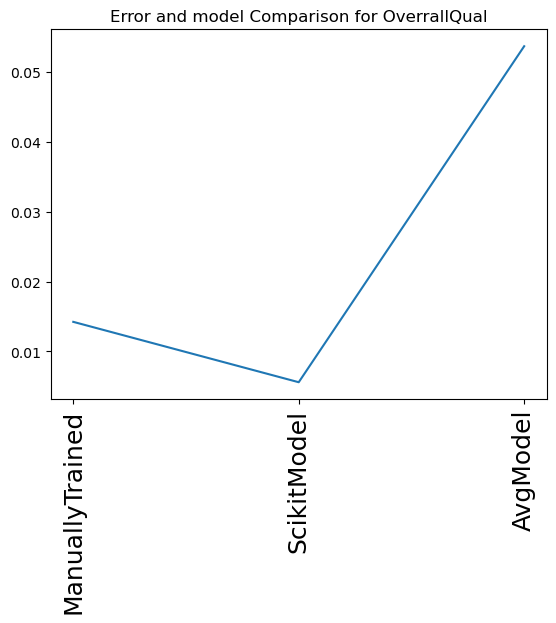

In [30]:
ufs.histogramErrors(np.array([manualModelError, scikitModelError, avgModelError]), "Error and model Comparison for OverrallQual")


### Conclusion: Our model trained with Scikit had a better performance due to having a minor error when using overallColumn

In [31]:
manualModelPreds, scikitPreds, avgPreds = regressionFromScratch.predict_comparison(
    testVectorFirstFloor,
    manuallyTrainedModel=modelsFirstFloor[-1],
    sciKitModel=sciKitFirstFloorModel
)

yTest = salesColumn_test.to_numpy()

manualModelError = regressionFromScratch.calculate_rmse(manualModelPreds, yTest, manualModelPreds.size)
scikitModelError = regressionFromScratch.calculate_rmse(scikitPreds, yTest, scikitPreds.size)
avgModelError = regressionFromScratch.calculate_rmse(avgPreds, yTest, avgPreds.size)
print(f"Error for model manually trained: {manualModelError}")
print(f"Error for model trained by scikit: {scikitModelError}")
print(f"Error for avg model: {avgModelError}")




Error for model manually trained: 0.017337118542267837
Error for model trained by scikit: 0.008534679085213834
Error for avg model: 0.05368745682351232


### Conclusion: Our model trained with Scikit had a better performance due to having a minor error when using firstFloor

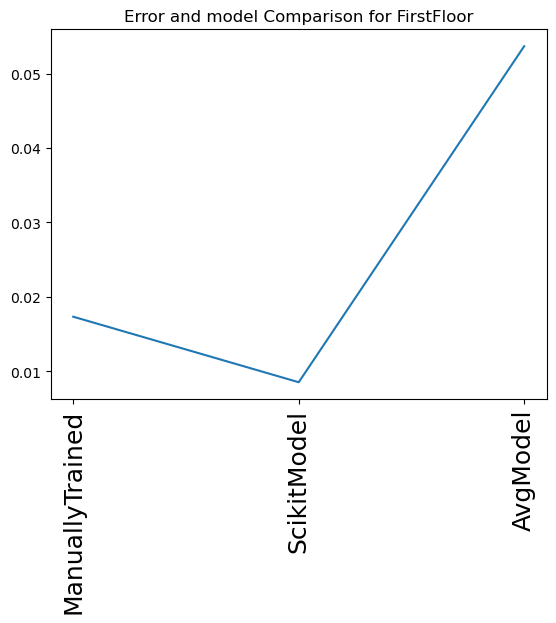

In [32]:
ufs.histogramErrors(np.array([manualModelError, scikitModelError, avgModelError]), "Error and model Comparison for FirstFloor")

## Sources

https://vitalflux.com/pearson-correlation-coefficient-statistical-significance/

https://towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72

https://www.kdnuggets.com/linear-regression-from-scratch-with-numpy

https://www.analyticsvidhya.com/blog/2021/06/getting-started-with-machine-learning-implementing-linear-regression-from-scratch/